In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('homeprices2.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [7]:
#machine learning model can't be trained with strings therefore we should convert them into numerical values
#using get_dummies method in pandas we can do that

dummies = pd.get_dummies(df.town)
dummies

#using below table, if we want to get monroe township thevalue = 1 0 0
#                                     robinsville              = 0 0 1
#                                     west windsor             = 0 1 0



,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [23]:
#concatenate two tables
#axis attribute takes column wise or row wise "columns", "rows"

concatenated = pd.concat([df,dummies],axis='columns')
concatenated

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [9]:
#drop unneccesary columns
#to reduce dummy variable trap we should drop one of dummy varibale

final = concatenated.drop(['town', 'west windsor'], axis = 'columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [25]:
reg = LinearRegression()

In [27]:
#axis = 1 => columns
#axis = 0 => rows

x = final.drop('price', axis = 1)
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [15]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [33]:
reg.fit(x,y)

LinearRegression()

In [34]:
#predict home price with 2800 area and located in robinsville

reg.predict([[2800, 0, 1]])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [35]:
#predict home price with 2800 area and located in west windsor

reg.predict([[3400, 0, 0]])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [36]:
import joblib as jb

In [37]:
jb.dump(reg, 'model_jb')

['model_jb']

In [38]:
mjb = jb.load('model_jb')

In [39]:
mjb.predict([[3400, 0, 0]])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [41]:
#check how much accurate use trained model is
#if it is 1, it means trained model is perfect

reg.score(x,y)

0.9573929037221871

# Excercise


In [2]:
dd = pd.read_csv('carprices.csv')
dd

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
import matplotlib.pyplot as plt

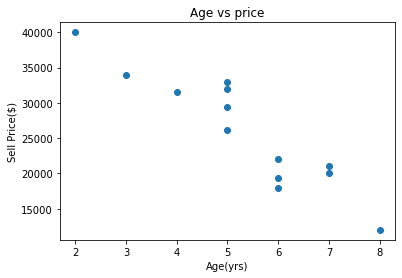

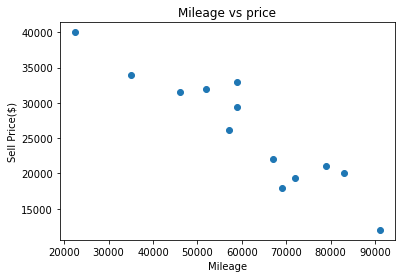

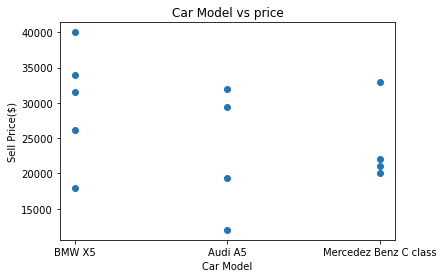

In [8]:
plt.scatter(dd['Age(yrs)'], dd['Sell Price($)'])
plt.title('Age vs price')
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.show()

plt.scatter(dd['Mileage'], dd['Sell Price($)'])
plt.title('Mileage vs price')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.show()

plt.scatter(dd['Car Model'], dd['Sell Price($)'])
plt.title('Car Model vs price')
plt.xlabel('Car Model')
plt.ylabel('Sell Price($)')
plt.show()

In [11]:
dummy = pd.get_dummies(dd['Car Model'])
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [13]:
concatenated = pd.concat([dd,dummy],axis='columns')
concatenated

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [14]:
merged = concatenated.drop(['Car Model', 'Mercedez Benz C class'], axis = 'columns')
merged

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [15]:
X = merged.drop(['Sell Price($)'], axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [16]:
Y = dd['Sell Price($)']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [17]:
reg2 = LinearRegression()

In [18]:
reg2.fit(X,Y)

LinearRegression()

In [20]:
reg2.predict([[45000, 4, 0, 0]])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [22]:
reg2.score(X,Y)

0.9417050937281082

In [23]:
reg2.predict([[86000, 7, 0, 1]])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])